In [1]:
import hmr_utils
import os

import feature_extraction_hmr as hmr_fit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as so

from matplotlib.lines import Line2D
import gvar as gv

hmr_utils.set_mplstyle()

In [2]:
def chisquare(y_obs,y_mod,sigma,ddof=1):
    """Calculate the (reduced) chi-square value."""
    
    return np.sum((y_obs-y_mod)**2/sigma**2)/ddof

In [3]:
# Update these as appropriate

hmr_path = 
tikh_path = 

confpath = 

In [4]:
channel = 

Nt = 
t1= 
t2= 

wmin =
alpha =

t = np.arange(t1,t2)

# Get correlation data -- you might need to change this part too.
mean, _, cov = hmr_utils.get_sample(f"{confpath}/32x{Nt}",channel,n_samples=-1,Nt=Nt, t1=t1,t2=t2)

# Estimate HMR-Cov resolution widths

In [5]:
line = lambda x,m,c: m*x+c

In [6]:
# Get resolution width (width of -1 represents failed fit)

w,eps, area, A = hmr_utils.get_epsfunc(f"{hmr_path}/{channel}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/alpha_{alpha}/out.avgc",channel,Nt,alpha,wmin,t1,t2)

Text(0.5, 0, '$\\omega_0$')

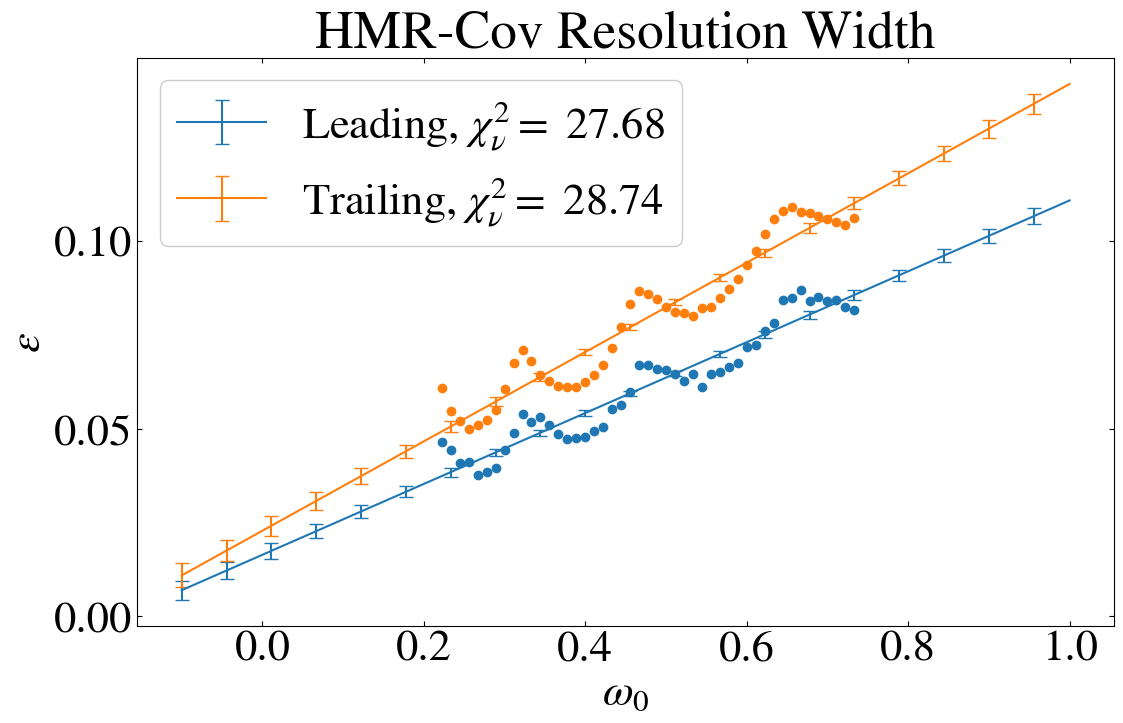

In [7]:
plt.figure(figsize=(12,8))

for pos, label in enumerate(['Leading','Trailing']):
    
    _eps = np.asarray([e.mean for e in eps[:,pos]])
    
    edge_mask = np.logical_and(w+float(wmin) < 0.8*max(w+float(wmin)), w+float(wmin) > 0.1*max(w))
    fail_mask = _eps != -1  # Failed fit mask
    mask = np.logical_and(edge_mask,fail_mask)
    
    # Get optimal fit parameters for line fit
    popt, pcov = so.curve_fit(line, w[mask],_eps[mask])
    
    popt = gv.gvar(popt,pcov)  # Promote optimal fit parameters to gvar object
    
    # Model resolution width from fit
    mod_eps = line(w,*popt)    
    chisq = chisquare(_eps[mask],np.asarray([m.mean for m in mod_eps[mask]]),np.asarray([m.sdev for m in mod_eps[mask]]),ddof = sum(mask)-2)
    
    plt.scatter(w[mask],_eps[mask])
    plt.errorbar(w,[m.mean for m in mod_eps],[m.sdev for m in mod_eps],label=f"{label}, $\chi_\\nu^2=$ {chisq:.2f}", errorevery=5)
    
plt.title("HMR-Cov Resolution Width")
plt.legend()
plt.ylabel(r'$\varepsilon$')
plt.xlabel(r'$\omega_0$')

In [8]:
def gauss(x,a,b,c):
    return a*np.exp(-0.5*((x-b)/c)**2)

[-0.04444444  0.02222222  0.12222222  0.34444444  0.74444444]
[ 8.16441536  0.34296416 -0.05303986]
0.34444444444444444


Text(0.5, 0, '$\\omega$')

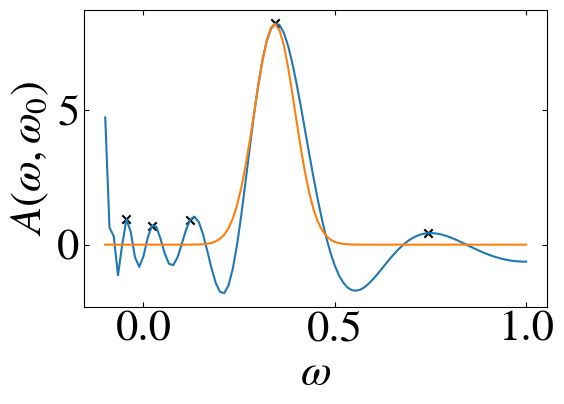

In [9]:
# Quick test to check A-function fitting is working

s = 40

index, locations = hmr_fit.get_peaks(w,A[s])
print(locations)

popt,pcov = hmr_fit.main(A[s],None,w,channel,Nt,float(wmin),1.0,float(alpha),a=0,w_feat=w[s], return_popt=True,method='leading')
popt
print(popt)
plt.plot(w,A[s])
print(w[s])

for i, loc in zip(index,locations):
    plt.scatter(loc,A[s][i],c='k',marker='x') # plot peaks

plt.plot(w,gauss(w,*popt))
plt.ylabel("$A(\omega,\omega_0)$")
plt.xlabel("$\omega$")

Text(0.5, 0, '$\\omega_0$')

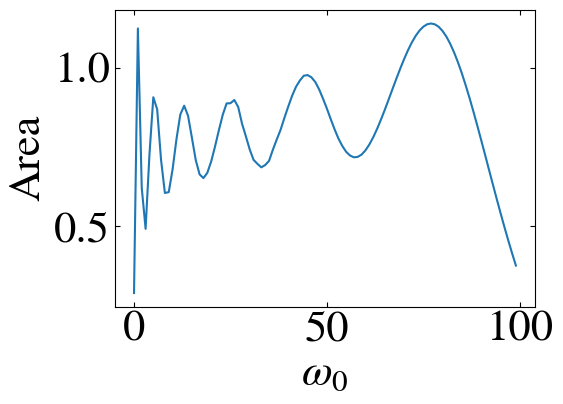

In [10]:
plt.plot(area)
plt.ylabel("Area")
plt.xlabel("$\omega_0$")

# Estimate HMR-Tikh resolution widths

In [11]:
w,eps, area, A = hmr_utils.get_epsfunc(f"{tikh_path}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/alpha_{alpha}/out.avgc",channel,Nt,alpha,wmin,t1,t2)

Text(0.5, 0, '$\\omega_0$')

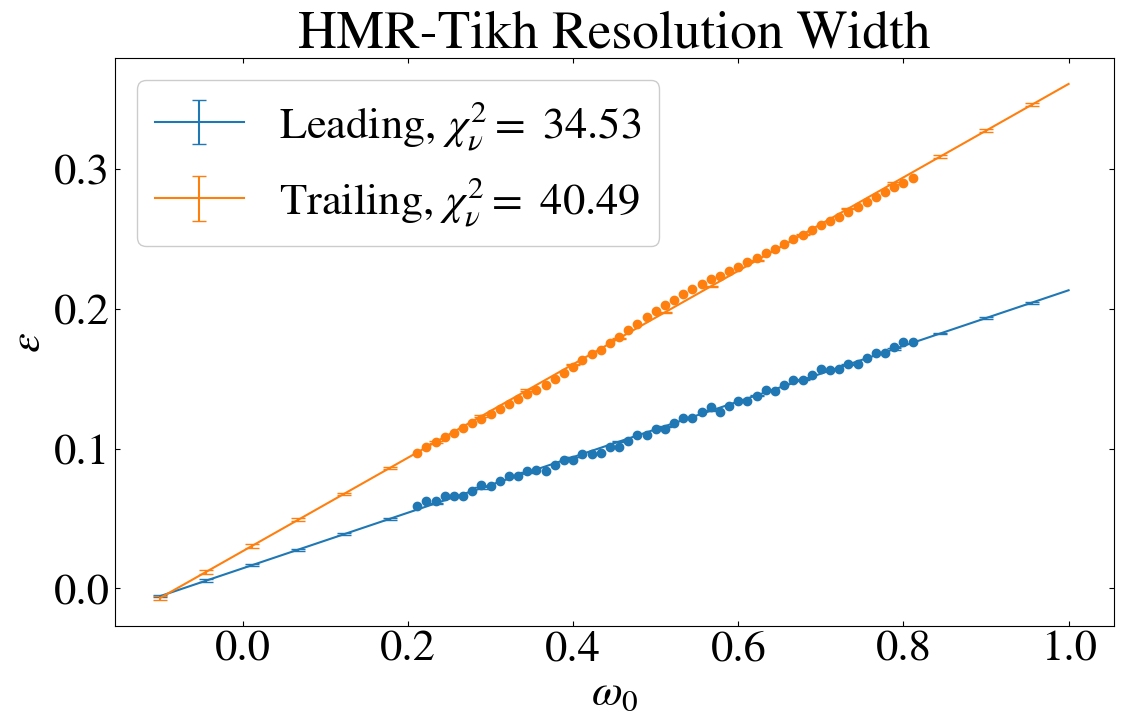

In [12]:
plt.figure(figsize=(12,8))

for pos, label in enumerate(['Leading','Trailing']):
    
    _eps = np.asarray([e.mean for e in eps[:,pos]])
    
    edge_mask = np.logical_and(w+float(wmin) < 0.8*max(w+float(wmin)), w+float(wmin) > 0.1*max(w))
    fail_mask = _eps != -1  # Failed fit mask
    mask = np.logical_and(edge_mask,fail_mask)
    
    # Get optimal fit parameters for line fit
    popt, pcov = so.curve_fit(line, w[mask],_eps[mask])
    
    popt = gv.gvar(popt,pcov)  # Promote optimal fit parameters to gvar object
    
    # Model resolution width from fit
    mod_eps = line(w,*popt)    
    chisq = chisquare(_eps[mask],np.asarray([m.mean for m in mod_eps[mask]]),np.asarray([m.sdev for m in mod_eps[mask]]),ddof = sum(mask)-2)
    
    plt.scatter(w[mask],_eps[mask])
    plt.errorbar(w,[m.mean for m in mod_eps],[m.sdev for m in mod_eps],label=f"{label}, $\chi_\\nu^2=$ {chisq:.2f}", errorevery=5)
    
plt.title("HMR-Tikh Resolution Width")
plt.legend()
plt.ylabel(r'$\varepsilon$')
plt.xlabel(r'$\omega_0$')

Note that the value of $\chi^2_\nu$ is now much larger than before, as I have removed the propagated error from the fit to the smearing kernels. This is because the smearing kernels do not have an error, so my fitting routine was vastly overestimating the fit error. This is something that one should keep in mind.

# HMR-Cov error analysis

attempt to get argmin of an empty sequence


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


attempt to get argmin of an empty sequence
attempt to get argmin of an empty sequence


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


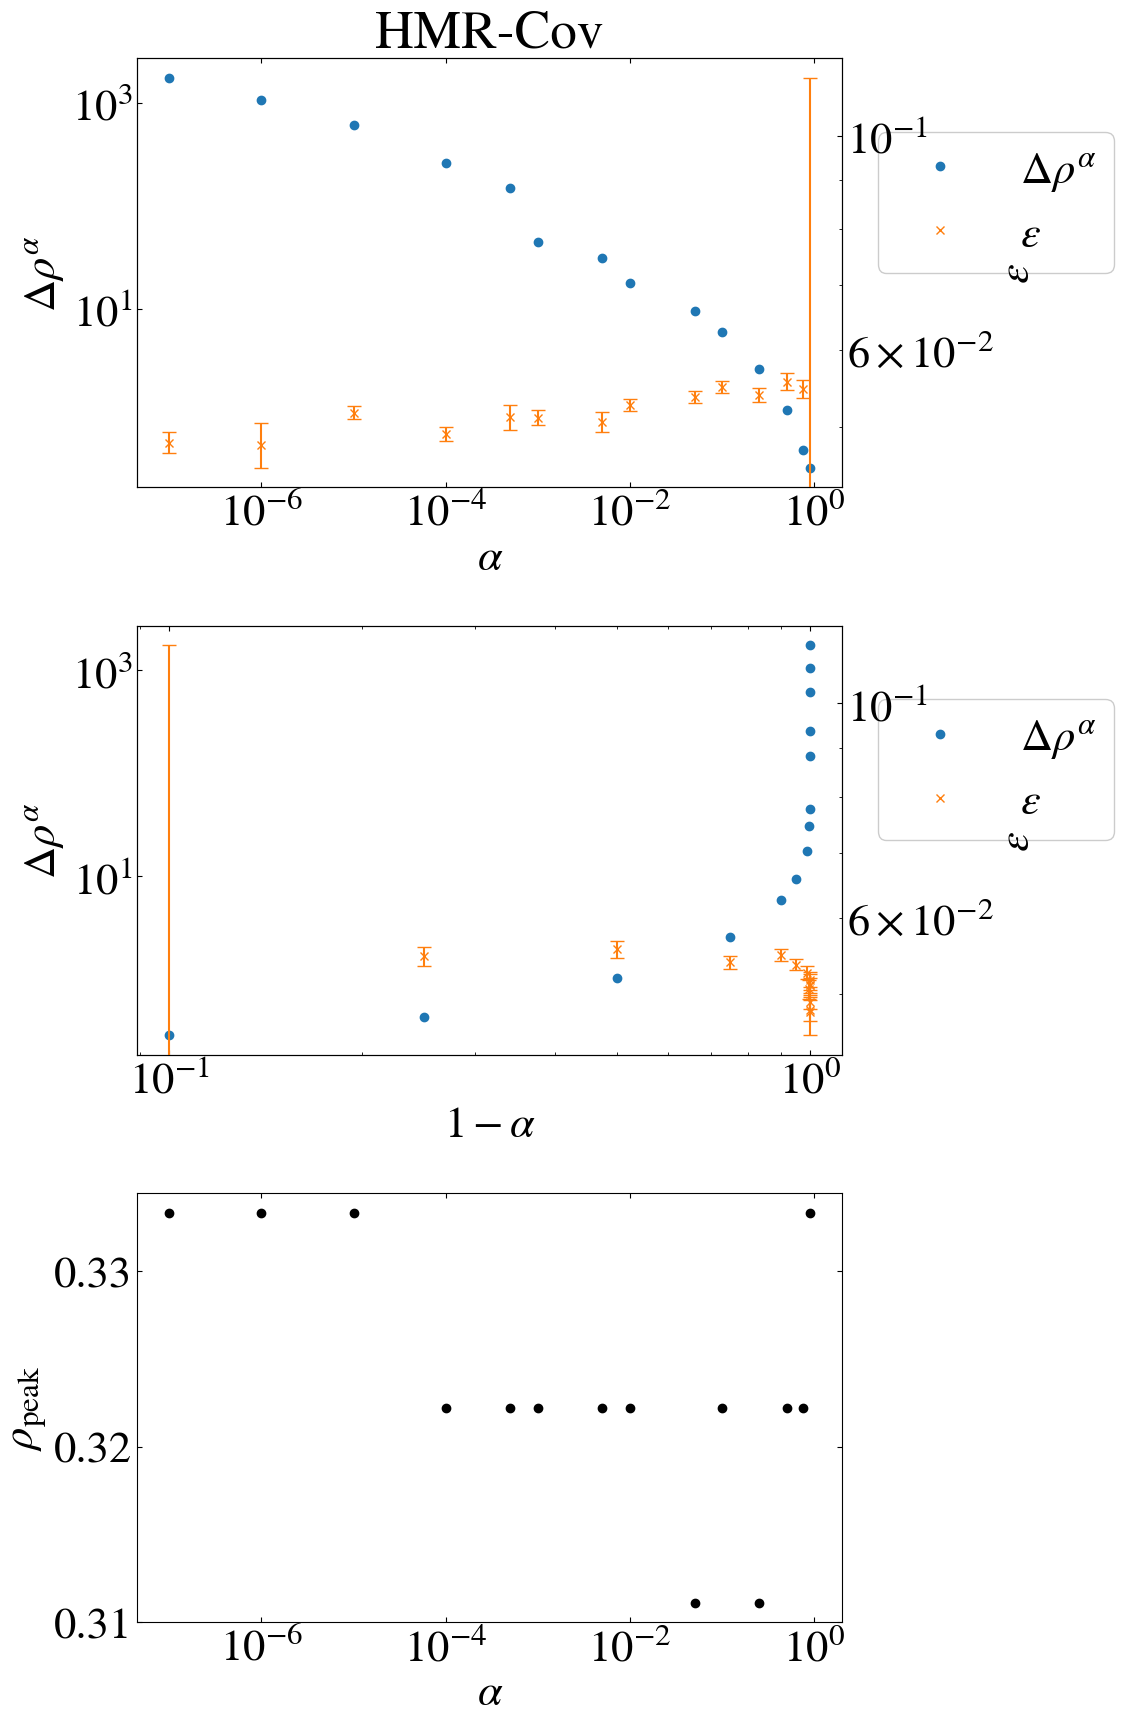

In [13]:
c = ['C0','C1','C2']
label = ["hmr"]

fig,ax = plt.subplots(3,1,figsize=(12,18))

ax1_twin = ax[0].twinx()
ax2_twin = ax[1].twinx()

for pos,cpath in enumerate([hmr_path]): 
    
    if cpath == hmr_path:
        shifts = [0]
        alphas = os.listdir(f"{cpath}/{channel}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}")
    else:
        shifts = [.0, .05, .1, .15, .2, .25, ]
        alphas = ['alpha_0.1','alpha_0.001','alpha_0.000001']
    
    for apos, apath in enumerate(alphas):
        for shift in shifts:
            try:
                coeffs = pd.read_csv(f"{cpath}/{channel if cpath == hmr_path else ''}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/{apath}/out.avgc",sep=',').values[:]
        
                w = np.linspace(float(wmin),1,coeffs.shape[0])+shift
        
                rho = np.matmul(coeffs,mean*np.exp(shift*t).T)

                transformed_cov = np.fromfunction(lambda x,y: np.exp(shift*(x+y+2)),(Nt-1,Nt-1))*cov
                
                rho_sigma = np.matmul(np.matmul(coeffs,transformed_cov),coeffs.T)
                rho_err = np.sqrt(np.diag(rho_sigma))

                index, locations = hmr_fit.get_peaks(w,rho) # Get location of spectral peak
                
                s = np.argmin(abs(locations-0.33))
                peak_loc = locations[s]  # Location of ground state peak
                
                peak_index = np.argmin(abs(w-peak_loc))
                A_index = peak_index
                
                # Plot location of peak
                ax[2].scatter(float(apath.split('_')[1]),peak_loc,c='k')
                
                A = np.matmul(coeffs,np.exp(-w*t.reshape(-1,1)))
               
                # Get resolution width
                _, eps, _, _ = hmr_utils.get_epsfunc(f"{cpath}/{channel if cpath == hmr_path else 's01'}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/{apath}/out.avgc",channel,Nt,alpha,wmin,t1,t2)
                
                _eps = np.asarray([e.mean for e in eps[:,pos]])
                _epserr = np.asarray([e.sdev for e in eps[:,pos]])
    
                # data masking
                edge_mask = np.logical_and(w+float(wmin) < 0.8*max(w+float(wmin)), w+float(wmin) > 0.1*max(w))
                fail_mask = _eps != -1  # Failed fit mask
                mask = np.logical_and(edge_mask,fail_mask)
    
                # get model resolution width via fit
                popt, pcov = so.curve_fit(line, w[mask],_eps[mask])
                perr = np.sqrt(np.diag(pcov))
            
                mod_eps = w[A_index]*gv.gvar(popt[0],perr[0]) + gv.gvar(popt[1],perr[1])
                
                if cpath == hmr_path:
                    ax[0].scatter(float(apath.split('_')[1]),rho_err[peak_index],color=c[pos])
                    ax[1].scatter(1-float(apath.split('_')[1]),rho_err[peak_index],color=c[pos])
                    
                    if mod_eps.mean < 1: # Catch bad fits
                        ax1_twin.errorbar(float(apath.split('_')[1]),mod_eps.mean,mod_eps.sdev,c="C1",fmt='x')             
                        ax2_twin.errorbar(1-float(apath.split('_')[1]),mod_eps.mean,mod_eps.sdev,c="C1",fmt='x')

            except Exception as e:
                print(e)
        
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel(r'$\Delta\rho^\alpha$')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].set_xlabel(r'$1-\alpha$')
ax[1].set_ylabel(r'$\Delta\rho^\alpha$')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

ax1_twin.set_yscale('log')
ax1_twin.set_ylabel(r'$\epsilon$')
ax2_twin.set_yscale('log')
ax2_twin.set_ylabel(r'$\epsilon$')

ax[0].set_title("HMR-Cov")

ax[2].set_xlabel(r"$\alpha$")
ax[2].set_ylabel(r"$\rho_\mathrm{peak}$")
ax[2].set_xscale('log')

# create legends

legend_elements = [Line2D([0], [0], color='C0',marker='o', lw=0, label=r'$\Delta\rho^\alpha$'),
                   Line2D([0], [0], color='C1', marker='x', lw=0,label=r'$\epsilon$')]

ax[0].legend(handles=legend_elements, loc=(1.05,0.5))
ax[1].legend(handles=legend_elements, loc=(1.05,0.5))


plt.tight_layout()

Note the discretisation step in the above plot of $\rho_\text{peak}$.

# Tikh-Laplace error analysis

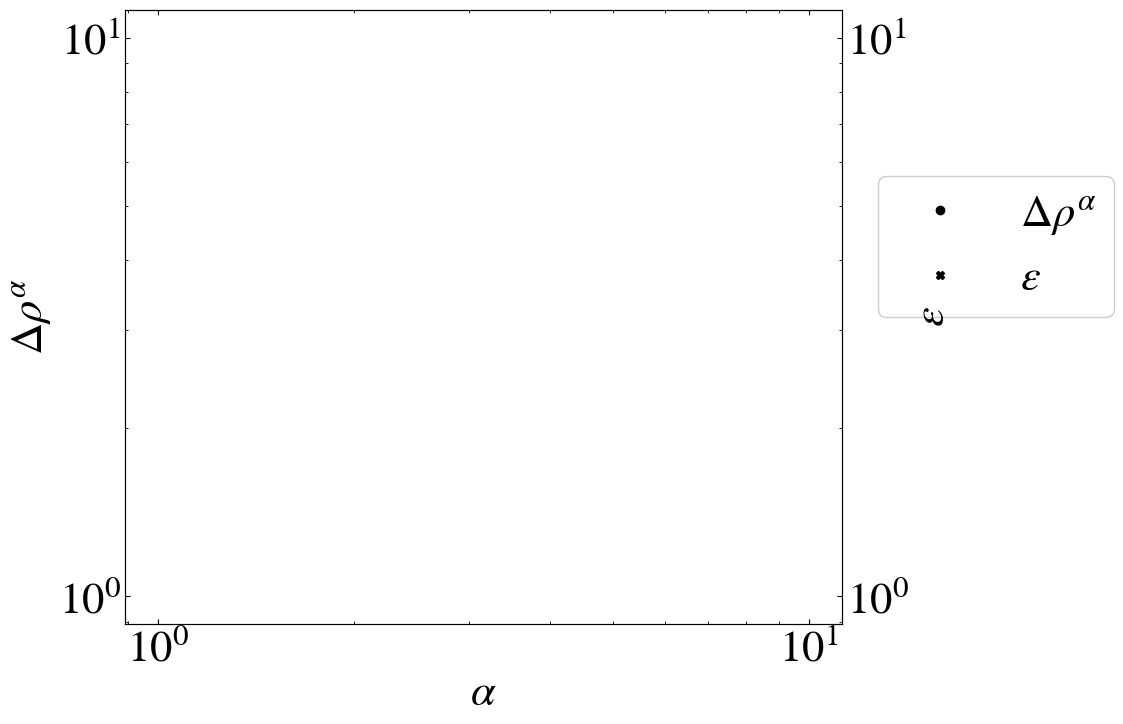

In [14]:
c = ['C0','C1','C2']
label = ["hmr","tikh"]

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax2 = ax.twinx()

for pos,cpath in enumerate([tikh_path]): 
    
    if cpath == hmr_path:
        shifts = [0]
        alphas = os.listdir(f"{cpath}/{channel}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}")
    else:
        shifts = [.0, .1, .2, .25, ]
        alphas = os.listdir(f"{cpath}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}")
    
    float_alphas = [float(a.lstrip("alpha_")) for a in alphas]

    # Iterate over available alphas
    for apos, apath in enumerate(alphas):
        
        # If specified, iterate over shifts
        for spos,shift in enumerate(shifts):
            try:
                coeffs = pd.read_csv(f"{cpath}/{channel if cpath == hmr_path else ''}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/{apath}/out.avgc",sep=',').values[:]
        
                w = np.linspace(float(wmin),1,coeffs.shape[0])+shift

                rho = np.matmul(coeffs,mean*np.exp(shift*t).T)

                transformed_cov = np.fromfunction(lambda x,y: np.exp(shift*(x+y+2)),(Nt-1,Nt-1))*cov
                
                rho_sigma = np.matmul(np.matmul(coeffs,transformed_cov),coeffs.T)
                rho_err = np.sqrt(np.diag(rho_sigma))
        
                index, locations = hmr_fit.get_peaks(w,rho) # Get location of spectral peak

                s = np.argmin(abs(locations-0.33))
                peak_loc = locations[s]  # Location of ground state peak
                
                peak_index = np.argmin(abs(w-peak_loc))
                
                A_index = np.argmin(abs(w-(peak_loc + shift)))
    
                A = np.matmul(coeffs,np.exp(-w*t.reshape(-1,1)))
               
                # Get resolution width
                _, eps, _, _ = hmr_utils.get_epsfunc(f"{cpath}/{channel if cpath == hmr_path else 's01'}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/{apath}/out.avgc",channel,Nt,alpha,wmin,t1,t2)
                
                _eps = np.asarray([e.mean for e in eps[:,pos]])
                _epserr = np.asarray([e.sdev for e in eps[:,pos]])
        
                # data masking
                edge_mask = np.logical_and(w+float(wmin) < 0.8*max(w+float(wmin)), w+float(wmin) > 0.1*max(w))
                fail_mask = _eps != -1  # Failed fit mask
                mask = np.logical_and(edge_mask,fail_mask)

                popt, pcov = so.curve_fit(lambda x,m,c: m*x+c, w[mask],_eps[mask])
                perr = np.sqrt(np.diag(pcov))
                            
                mod_eps = w[A_index]*gv.gvar(popt[0],perr[0]) + gv.gvar(popt[1],perr[1])
                    
                c = "k" if cpath == hmr_path else f"C{spos}"
                
                ax.scatter(float(apath.lstrip('alpha_')),rho_err[peak_index], c=c, marker='o')
                ax2.errorbar(float(apath.lstrip('alpha_')),mod_eps.mean,mod_eps.sdev, c=c, marker='X')            
            except Exception as e:
                #print(e)
                pass

# create legends

legend_elements = [Line2D([0], [0], color='k', marker='o',lw=0, label=r'$\Delta\rho^\alpha$'),
                   Line2D([0], [0], color='k', marker='X',lw=0, label=r'$\epsilon$')]

ax.legend(handles=legend_elements, loc=(1.05,0.5))
                
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\Delta\rho^\alpha$')
ax.set_xscale('log')
ax.set_yscale('log')

ax2.set_ylabel("$\epsilon$")
ax2.set_yscale('log')
ax2.set_ylabel('$\epsilon$')
plt.tight_layout()

# Combined comparison

/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.5, 1e-05, 1e-07, 0.001, 0.01, 0.75, 0.1, 1e-06, 0.05, 0.25, 0.0005, 0.005, 0.0001, 0.9]
-0.007557821898660222 0.2864438542009066


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1e-09, 1e-05, 1e-07, 0.001, 0.01, 1e-11, 1e-06, 0.05, 0.0005, 0.005, 0.0001, 1e-10, 1e-08]
0.16051083115931578 0.02243990518861004


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1e-09, 1e-05, 1e-07, 0.001, 0.01, 1e-11, 0.1, 1e-06, 0.05, 0.0005, 0.005, 0.0001, 1e-10, 1e-08]
-0.222963782778889 0.018796434501436275


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1e-09, 1e-05, 1e-07, 0.001, 0.01, 1e-11, 0.1, 1e-06, 0.05, 0.0005, 0.005, 0.0001, 1e-10, 1e-08]
-0.2889906684650546 0.02764482074477074


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1e-09, 1e-05, 1e-07, 0.001, 0.01, 1e-11, 0.1, 1e-06, 0.05, 0.0005, 0.005, 0.0001, 1e-10, 1e-08]
-0.3401217742897296 0.04390843960547144


/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1e-09, 1e-05, 1e-07, 0.001, 0.01, 1e-11, 0.1, 1e-06, 0.05, 0.0005, 0.005, 0.0001, 1e-10, 1e-08]
-0.3500878407617407 0.07107880148090485


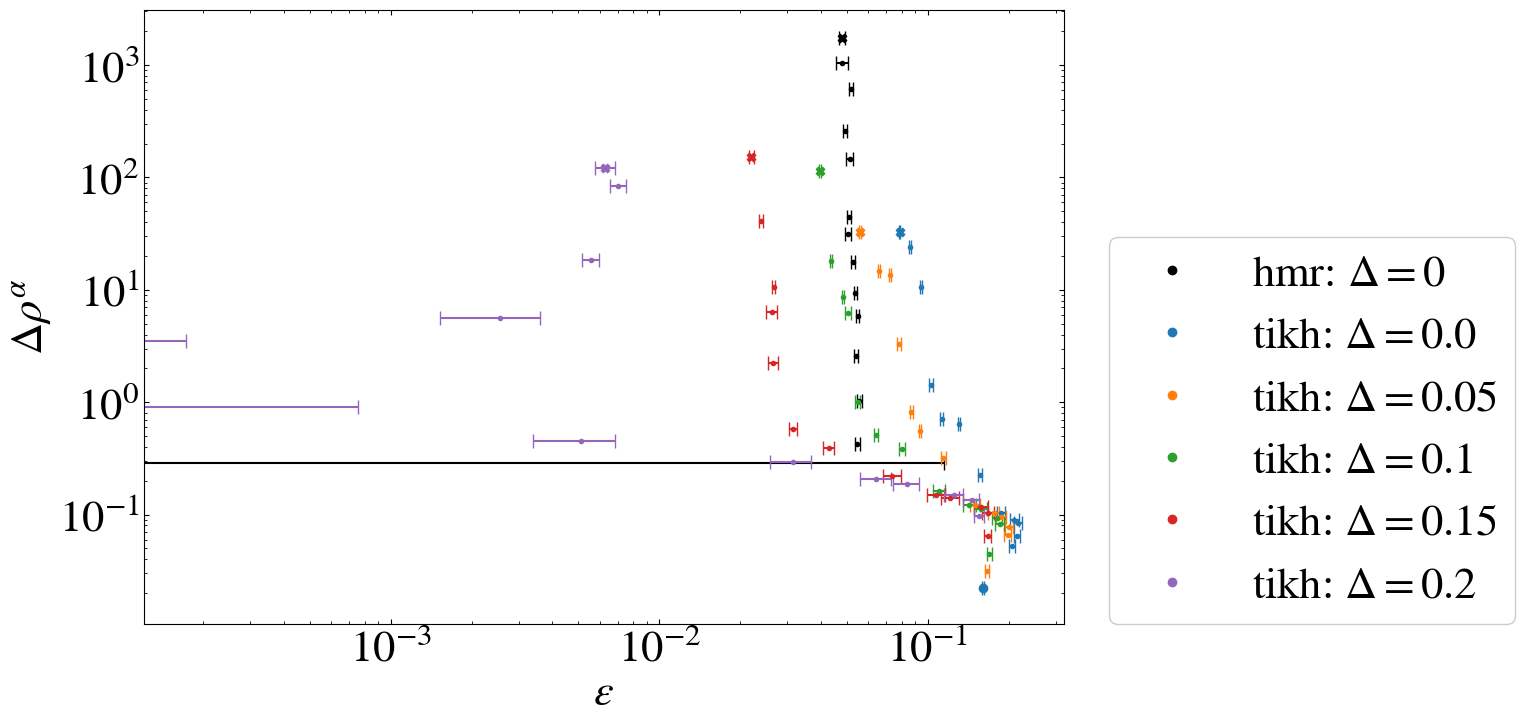

In [15]:
c = ['C0','C1','C2']
label = ["hmr","tikh"]

fig = plt.figure(figsize=(16,8))
ax = plt.gca()

legend_elements = []

for pos,cpath in enumerate([hmr_path,tikh_path]): 
    
    if cpath == hmr_path:
        shifts = [0]
        alphas = os.listdir(f"{cpath}/{channel}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}")
    else:
        shifts = [.0, .05, .1, .15, .2 ]
        alphas = os.listdir(f"{cpath}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}")
    
    float_alphas = [float(a.lstrip("alpha_")) for a in alphas]   
        
    # If specified, iterate over shifts
    for spos,shift in enumerate(shifts):
        
        plot_alphas = [] # save plotted alphas for later
        plot_eps = []
        plot_drho = []
        
        # Iterate over available alphas
        for apos, apath in enumerate(alphas):
            try:
                coeffs = pd.read_csv(f"{cpath}/{channel if cpath == hmr_path else ''}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/{apath}/out.avgc",sep=',').values[:]
        
                w = np.linspace(float(wmin),1,coeffs.shape[0])+shift
    
                rho = np.matmul(coeffs,mean*np.exp(shift*t).T)

                transformed_cov = np.fromfunction(lambda x,y: np.exp(shift*(x+y+2)),(Nt-1,Nt-1))*cov
                
                rho_sigma = np.matmul(np.matmul(coeffs,transformed_cov),coeffs.T)
                rho_err = np.sqrt(np.diag(rho_sigma))
    
                index, locations = hmr_fit.get_peaks(w,rho) # Get location of spectral peak

                s = np.argmin(abs(locations-0.33)) # Find index of peak nearest to 0.33
                peak_loc = locations[s]  # Location of ground state peak
                
                peak_index = np.argmin(abs(w-peak_loc))
                
                A_index = np.argmin(abs(w-(peak_loc - shift)))
                
                A = np.matmul(coeffs,np.exp(-w*t.reshape(-1,1)))
               
                # Get resolution width
                _, eps, _, _ = hmr_utils.get_epsfunc(f"{cpath}/{channel if cpath == hmr_path else ''}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/{apath}/out.avgc",channel,Nt,alpha,wmin,t1,t2)
                
                _eps = np.asarray([e.mean for e in eps[:,pos]])
                _epserr = np.asarray([e.sdev for e in eps[:,pos]])
    
                # data masking
                edge_mask = np.logical_and(w+float(wmin) < 0.8*max(w+float(wmin)), w+float(wmin) > 0.1*max(w))
                fail_mask = _eps != -1  # Failed fit mask
                mask = np.logical_and(edge_mask,fail_mask)

                popt, pcov = so.curve_fit(lambda x,m,c: m*x+c, w[mask],_eps[mask])
                perr = np.sqrt(np.diag(pcov))
            
                mod_eps = w[A_index]*gv.gvar(popt[0],perr[0]) + gv.gvar(popt[1],perr[1])
            
                c = "k" if cpath == hmr_path else f"C{spos}"
                
                ax.errorbar(mod_eps.mean,rho_err[peak_index], xerr=mod_eps.sdev,c=c, fmt='.')            
                
                plot_alphas.append(float_alphas[apos])
                plot_eps.append(mod_eps.mean)
                plot_drho.append(rho_err[peak_index])
                                                               
            except Exception as e:
                #print(e)
                pass
    
        min_alpha = np.argmin(plot_alphas)
        max_alpha = np.argmax(plot_alphas)
    
        c = 'k' if cpath == hmr_path else f"C{spos}"
        print(plot_alphas)
        plt.scatter(plot_eps[min_alpha],plot_drho[min_alpha],marker='X',c=c)
        print(plot_eps[max_alpha],plot_drho[max_alpha])
        plt.scatter(plot_eps[max_alpha],plot_drho[max_alpha],marker='o',c=c)
    
        legend_elements.append(Line2D([0], [0], color=c, marker='o',lw=0, label=f'{label[pos]}: $\Delta=${shift}'))

ax.legend(handles=legend_elements, loc=(1.05,0.0))
    
ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel(r'$\Delta\rho^\alpha$')
ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_xlim([1e-2,.5])

# Compare spectra

Text(0.5, 0, '$\\omega$')

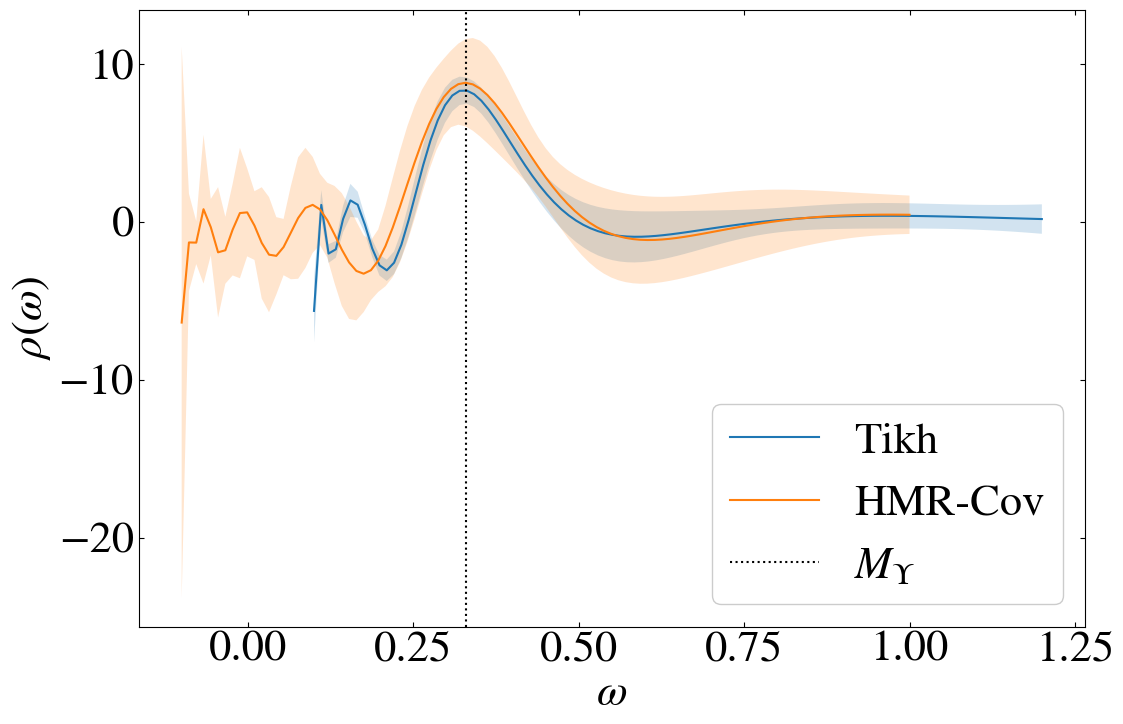

In [16]:
tikh_alpha = '0.000001'
tikh_shift = 0.2

hmr_alpha = '0.25'

plt.figure(figsize=(12,8))
ax = plt.gca()

tikh_coeffs = pd.read_csv(f"{tikh_path}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/alpha_{tikh_alpha}/out.avgc",header=None).values[:]
hmr_coeffs =  pd.read_csv(f"{hmr_path}/{channel}/{t1}_{t2}/Nt{Nt}/wmin_{wmin}/alpha_{hmr_alpha}/out.avgc",header=None).values[:]


# Generate Tikhonov spectrum                
tikh_spec = np.matmul(tikh_coeffs,mean*np.exp(tikh_shift*np.arange(t1,t2).T))
transformed_cov = np.fromfunction(lambda x,y: np.exp(tikh_shift*(x+y+2)),(Nt-1,Nt-1))*cov
tikh_cov = np.matmul(np.matmul(tikh_coeffs,transformed_cov),tikh_coeffs.T)

tikh_w = np.linspace(-0.1,1,tikh_coeffs.shape[0])

tikh_spec /= abs(np.trapz(tikh_spec,tikh_w)) # Normalise area
tikh_err = np.sqrt(np.diag(tikh_cov))/abs(np.trapz(tikh_spec,tikh_w))

# Generate HMR spectrum
hmr_spec = np.matmul(hmr_coeffs,mean)
hmr_cov = np.matmul(np.matmul(hmr_coeffs,cov),hmr_coeffs.T)
hmr_w = np.linspace(-0.1,1,hmr_coeffs.shape[0])

hmr_spec /= abs(np.trapz(hmr_spec,hmr_w)) # Normalise area
hmr_err = np.sqrt(np.diag(hmr_cov))/abs(np.trapz(hmr_spec,hmr_w))

ax.plot(tikh_w+tikh_shift,tikh_spec,label="Tikh")
ax.fill_between(tikh_w+tikh_shift, tikh_spec+tikh_err, tikh_spec-tikh_err,alpha=0.2)

ax.plot(hmr_w,hmr_spec,label="HMR-Cov")
ax.fill_between(hmr_w, hmr_spec+hmr_err, hmr_spec-hmr_err,alpha=0.2)

ax.axvline(0.33,ls=':',c='k',label=r'$M_\mathrm{\Upsilon}$')
plt.legend()
plt.ylabel(r"$\rho(\omega)$")
plt.xlabel(r"$\omega$")